In [1]:
# !pip install gym
# !pip install pygame
# ! pip install matplotlib


# https://www.gymlibrary.ml/environments/classic_control/cart_pole/?highlight=cart+pole

In [2]:
import gym
import numpy as np 
import matplotlib.pyplot as plt
import time

c:\Users\rossi\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [3]:
env = gym.make('CartPole-v1')
print(env.observation_space.low,"\n",env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [4]:
action_space = 2 # number of possible actions
bin_size = 15

overe0 = float(4)
overe1 = float(4)/2**1
overe2 = float(4)/2**2
overe3 = float(4)/2**3
overe4 = float(4)/2**4
overe5 = float(4)/2**5
overe6 = float(4)/2**6

lin_space = [-overe0, -overe1, -overe2, -overe3, -overe4, -overe5, -overe6, 0, overe6, overe5, overe4, overe3, overe2, overe1, overe0]

def Qtable(state_space,action_space,bin_size=15 ):
    bins = [np.linspace(-2.4,2.4,bin_size),
            lin_space,
            np.linspace(-0.2095,0.2095,bin_size),
            lin_space]
   
    q_table = np.random.uniform(low=-1,high=1,size=([len(bins[0]), len(bins[1]), len(bins[2]), len(bins[3])] + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

In [5]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
   
    return action

In [6]:
def plotLearning(data, episodes, timestep):
    ep = [i for i in range(0,episodes + 1,timestep)]
    plt.plot(ep, data['max'], label = 'Max')
    plt.plot(ep, data['avg'], label = 'Avg')
    plt.plot(ep, data['min'], label = 'Min')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend(loc = "upper left") 

In [7]:
def updateQtable(action, reward, current_state,next_state, gamma, lr):
    max_future_q = np.max(q_table[next_state])
    current_q = q_table[current_state+(action,)]
    new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
    q_table[current_state+(action,)] = new_q

In [8]:
    
def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 5000, epsilon = 0.05):
    rewards = 0
    runs = [0]
    data = {'max' : [0], 'avg' : [0], 'min': [0]}
    solved = {'episodes' : [], 'timeMinutes': []}
    timesWon = 0 
    episodes_to_solve = 0
    process_time = time.time()

    for episode in range(1,episodes+1):
        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        
        while not done:
            ep_start = time.time()
            # if timesWon > 0:
            #     env.render()
    
            action = epsilon_greedy_policy(current_state, q_table, epsilon)
            obs, reward, done, info = env.step(action)
            next_state = Discrete(obs,bins)
            score += reward
            
            if done and score == 0:  #falls in the first try
                pass
            else:
                updateQtable(action, reward, current_state,next_state, gamma, lr)

            current_state = next_state
            
        # End of the loop update
        else:
            if score >= 500 or timesWon > 0:
                epsilon = 0
            else:
                epsilon = 0.06
            env.reset()
            rewards += score
            runs.append(score)
        
        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Avg. Rewards -> {} | Max reward : {} | Min Reward : {}'.format(episode,rewards/timestep, max(runs), min(runs)))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            data['min'].append(min(runs))
            episodes_to_solve = episode
            if rewards/timestep >= 475:
                timesWon += 1 
                print('Solved in episode : {}'.format(episode))
                solved['episodes'].append(episode)
                solved['timeMinutes'].append(round((time.time() - process_time)/60,2))
                epsilon = 0

            rewards, runs= 0, [0]
            
        if timesWon == 5:
            episodes_to_solve = episode
            break

    plotLearning(data, episodes_to_solve, timestep)
    print('Solved ' + str(timesWon) + ' times in ' + str(solved))
    env.close()

Episode : 1000 | Avg. Rewards -> 22.162 | Max reward : 106.0 | Min Reward : 0
Episode : 2000 | Avg. Rewards -> 25.537 | Max reward : 93.0 | Min Reward : 0
Episode : 3000 | Avg. Rewards -> 29.585 | Max reward : 113.0 | Min Reward : 0
Episode : 4000 | Avg. Rewards -> 38.678 | Max reward : 171.0 | Min Reward : 0
Episode : 5000 | Avg. Rewards -> 57.487 | Max reward : 163.0 | Min Reward : 0
Episode : 6000 | Avg. Rewards -> 70.267 | Max reward : 335.0 | Min Reward : 0
Episode : 7000 | Avg. Rewards -> 84.87 | Max reward : 311.0 | Min Reward : 0
Episode : 8000 | Avg. Rewards -> 103.415 | Max reward : 500.0 | Min Reward : 0
Episode : 9000 | Avg. Rewards -> 130.009 | Max reward : 500.0 | Min Reward : 0
Episode : 10000 | Avg. Rewards -> 174.709 | Max reward : 500.0 | Min Reward : 0
Episode : 11000 | Avg. Rewards -> 191.178 | Max reward : 500.0 | Min Reward : 0
Episode : 12000 | Avg. Rewards -> 188.554 | Max reward : 500.0 | Min Reward : 0
Episode : 13000 | Avg. Rewards -> 205.818 | Max reward : 5

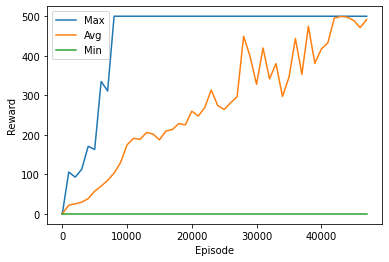

In [9]:
# TRANING
q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)
Q_learning(q_table, bins, lr = 0.14, gamma = 0.995, episodes = 2*10**5, timestep = 1000, epsilon = 0.06)